In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

[Dataset](https://www.kaggle.com/datasets/rever3nd/weather-data)

In [2]:
# Loading in the dataset
weather_data = pd.read_csv('weather.csv', index_col=0)

weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
# Check the dtypes of the columns
weather_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [4]:
columns_with_nans = []
for each_column in weather_data.columns:
    if weather_data[each_column].hasnans:
        columns_with_nans.append(each_column)

columns_with_nans

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [5]:
nanCategoricalColumns = []

for each_column in weather_data.columns:
    if weather_data[each_column].hasnans and weather_data[each_column].dtype == 'object':
        nanCategoricalColumns.append(each_column)

nanCategoricalColumns

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [6]:
# Let's handle the NaN values of the categorical columns before we one-hot encode them, however.

from sklearn.impute import SimpleImputer

imputed_weather_df = weather_data.copy()

categorical_imputer = SimpleImputer(strategy='most_frequent')

for each_column in nanCategoricalColumns:
    values = categorical_imputer.fit_transform(imputed_weather_df[[each_column]])
    imputed_weather_df[each_column] = values

for each_column in imputed_weather_df.columns:
    if imputed_weather_df[each_column].hasnans and imputed_weather_df[each_column].dtype == 'object':
        print('Found = ', each_column)

# Nothing should print, we imputed the categorical columns properly


In [7]:
# We have one categorical column that we don't want to encode, and that is Date, as we can just convert it to it's UTC time, therefore making it a continuous value.
# Let's do that before we decide to include it in the encoding process

dateified_weather_df = imputed_weather_df.copy()

years = []
months = []
days = []

for each_value in imputed_weather_df['Date']:
    [year, month, day] = [int(x) for x in each_value.split('-')]
    years.append(year)
    months.append(month)
    days.append(day)

dateified_weather_df['year'] = years
dateified_weather_df['month'] = months
dateified_weather_df['day'] = days
dateified_weather_df.drop(columns=['Date'], inplace=True)

Now, we one-hot encode all the categorical columns and create a new dataframe from running that process, and that is the dataframe we will be using for our predictions

In [8]:
only_categorical_columns = []

for each_column in dateified_weather_df.columns:
    if dateified_weather_df[each_column].dtype == 'object':
        only_categorical_columns.append(each_column)

print(only_categorical_columns)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# We now have an array of all the columns that contain categorical values, we can call the get_dummies method from the pandas library to achieve that encoding
# without having to manually use the OneHotEncoder class in the pandas library, Except, we want to exclude the column Date, as we can just convert that value
# to a continuous value.

dummified_weather_df = pd.get_dummies(dateified_weather_df, columns=only_categorical_columns)

dummified_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,1,0,1,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,1,1,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,1,1,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,1,0,1,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,1,0,1,0


In [10]:
only_categorical_columns = []

for each_column in dummified_weather_df.columns:
    if dummified_weather_df[each_column].dtype == 'object':
        only_categorical_columns.append(each_column)

only_categorical_columns, 'Removed all categorical columns' if len(
    only_categorical_columns) == 0 else 'Failed to remove all categorical columns'

([], 'Removed all categorical columns')

In [11]:
# Now, we can begin imputing all the columns, before standardizing the dataset using the StandardScaler class

nan_columns = []

imputed_dummified_weather_df = dummified_weather_df.copy()

for each_column in imputed_dummified_weather_df.columns:
    if imputed_dummified_weather_df[each_column].hasnans:
        nan_columns.append(each_column)

numerical_imputer = SimpleImputer()

for each_column in nan_columns:
    imputed_dummified_weather_df[each_column] = numerical_imputer.fit_transform(
        imputed_dummified_weather_df[[each_column]])

updated_nan_columns = []

for each_column in imputed_dummified_weather_df.columns:
    if imputed_dummified_weather_df[each_column].hasnans:
        updated_nan_columns.append(each_column)

print(updated_nan_columns), 'Imputed all NaN columns successfully!' if len(
    updated_nan_columns) == 0 else 'Failed to impute all NaN columns'

[]


(None, 'Imputed all NaN columns successfully!')

In [12]:
remaining_categorical_columns = []

for each_column in imputed_dummified_weather_df.columns:
    if imputed_dummified_weather_df[each_column].dtype == 'object':
        remaining_categorical_columns.append(each_column)

remaining_categorical_columns, 'No categorical columns remain' if len(
    remaining_categorical_columns) == 0 else 'Some categorical columns remain'

([], 'No categorical columns remain')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor, BayesianRidge, Lasso
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, \
    RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error

selected_feature = 'MinTemp'

scaler = StandardScaler()

scaled_imputed_dummified_weather_df = imputed_dummified_weather_df.copy()

scaled_imputed_dummified_weather_df = scaler.fit_transform(
    scaled_imputed_dummified_weather_df.drop(selected_feature, axis=1))

x_train, x_test, y_train, y_test = train_test_split(scaled_imputed_dummified_weather_df,
                                                    imputed_dummified_weather_df[selected_feature], test_size=0.2,
                                                    )

regressors = [
    LinearRegression(),
    Ridge(),
    RidgeCV(),
    SGDRegressor(),
    BayesianRidge(),
    Lasso(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor()
]

logging_columns = ['Regressor', 'Score', 'MAE']
log = pd.DataFrame(columns=logging_columns)

for rg in regressors:
    rg.fit(x_train, y_train)
    name = rg.__class__.__name__
    print('=' * 40)
    print(name)

    print('**Results**')
    train_predictions = rg.predict(x_test)
    acc = explained_variance_score(y_test, train_predictions)
    print('Variance Score: {:.2%}'.format(acc))

    mae = mean_absolute_error(y_test, train_predictions)
    print('MAE : {:.2%}'.format(mae))

    score = rg.score(x_test, y_test)
    print('SCORE : {:.2%}'.format(score))

    log_entry = pd.DataFrame([[name, score * 100, mae]], columns=logging_columns)
    log = pd.concat([log, log_entry])


LinearRegression
**Results**
Variance Score: 91.01%
MAE : 132.71%
SCORE : 91.01%
Ridge
**Results**
Variance Score: 91.01%
MAE : 132.71%
SCORE : 91.01%
RidgeCV
**Results**
Variance Score: 91.01%
MAE : 132.71%
SCORE : 91.01%
SGDRegressor
**Results**
Variance Score: 90.91%
MAE : 134.05%
SCORE : 90.90%
BayesianRidge
**Results**
Variance Score: 91.01%
MAE : 132.72%
SCORE : 91.01%
Lasso
**Results**
Variance Score: 78.40%
MAE : 220.53%
SCORE : 78.40%
AdaBoostRegressor
**Results**
Variance Score: 83.42%
MAE : 205.86%
SCORE : 81.87%
BaggingRegressor
**Results**
Variance Score: 91.91%
MAE : 124.58%
SCORE : 91.90%
ExtraTreesRegressor
**Results**
Variance Score: 92.93%
MAE : 117.14%
SCORE : 92.92%
GradientBoostingRegressor
**Results**
Variance Score: 92.34%
MAE : 122.38%
SCORE : 92.33%
RandomForestRegressor
**Results**
Variance Score: 92.69%
MAE : 118.77%
SCORE : 92.68%


Text(0.5, 1.0, 'Prediction Score')

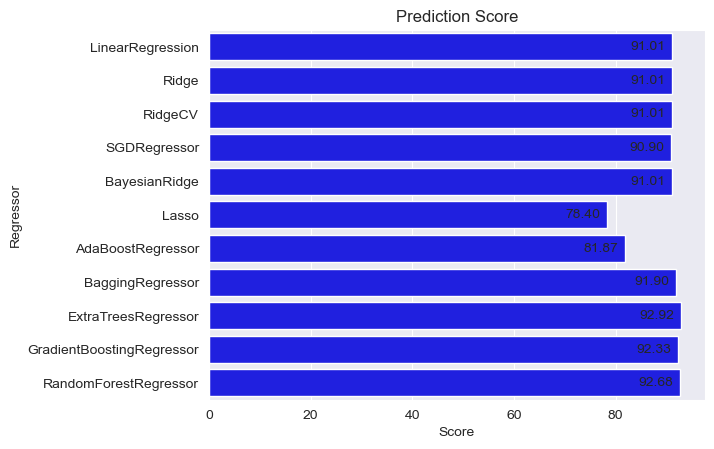

In [14]:
score_axes = sns.barplot(data=log, x='Score', y='Regressor', color='b')
score_axes.bar_label(score_axes.containers[0], padding=-30, fmt='%.2f')
score_axes.set_title('Prediction Score')

Text(0, 0.5, 'Regressor')

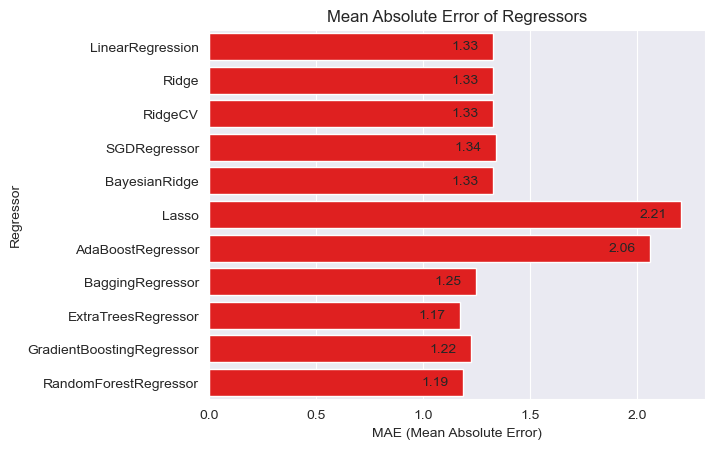

In [15]:
mae_axes = sns.barplot(data=log, x='MAE', y='Regressor', color='r')
mae_axes.bar_label(mae_axes.containers[0], padding=-30, fmt='%.2f')
mae_axes.set_title('Mean Absolute Error of Regressors')
mae_axes.set_xlabel('MAE (Mean Absolute Error)')
mae_axes.set_ylabel('Regressor')

Observations:
- Extra Trees Regressor has the highest score
- Extra Trees Regressor has the lowest MAE
- Extra Trees Regressor has low variability with high bias

Choice of regressor for making the prediction: Extra Trees Regressor

In [16]:
etr = ExtraTreesRegressor()

etr.fit(x_train, y_train)

pred = etr.predict(x_test)

y_test_clone = y_test.copy()

y_test_clone['prediction'] = pred.tolist()

etr.score(x_test, y_test)

0.9289162242564784